Best model: logs_2.csv
Mean SSIM: 0.8786478936672211
Mean MSE: 0.0022176914499141
Mean Loss: 0.0022119684775437


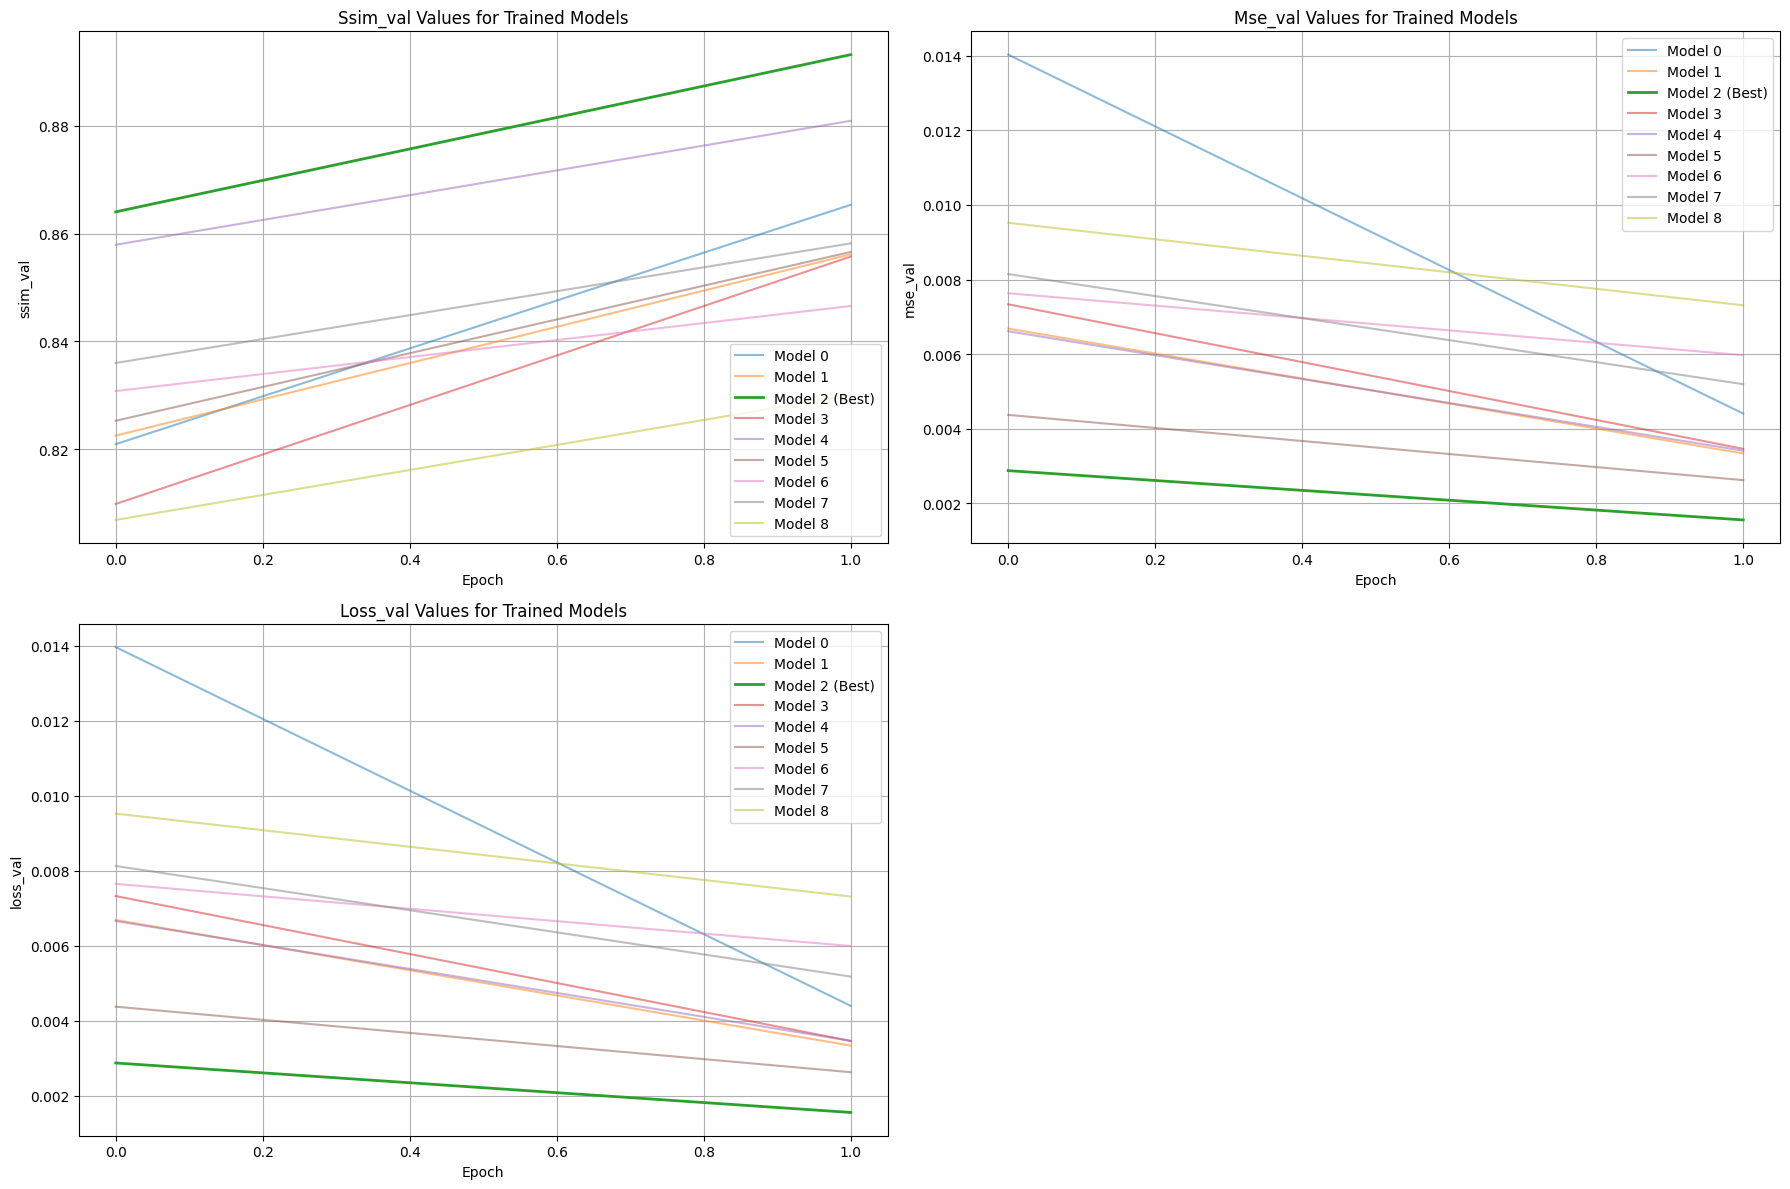

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load all log files into a list of dataframes
logs = []
for i in range(9):
    filename = f"logs_{i}.csv"
    df = pd.read_csv(filename)
    logs.append(df)

# Calculate mean values for each metric for each model
metrics = ['ssim_val', 'mse_val', 'loss_val']
mean_values = {}
for metric in metrics:
    mean_values[metric] = [df[metric].mean() for df in logs]

# Find the index of the model with the highest mean SSIM
best_model_idx = mean_values['ssim_val'].index(max(mean_values['ssim_val']))

# Plot metrics for each model
plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    for j, df in enumerate(logs):
        if j == best_model_idx:
            plt.plot(df[metric], label=f"Model {j} (Best)", linewidth=2)
        else:
            plt.plot(df[metric], label=f"Model {j}", alpha=0.5)
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.title(f'{metric.capitalize()} Values for Trained Models')
    plt.legend()
    plt.grid(True)

# Print the details of the best model
best_model_name = f"logs_{best_model_idx}.csv"
print(f"Best model: {best_model_name}")
print(f"Mean SSIM: {mean_values['ssim_val'][best_model_idx]}")
print(f"Mean MSE: {mean_values['mse_val'][best_model_idx]}")
print(f"Mean Loss: {mean_values['loss_val'][best_model_idx]}")

# Additional analysis or comparison can be done here using the mean_values dictionary
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# Load logs_0 and logs_2
log_0 = pd.read_csv("logs_0.csv")
log_2 = pd.read_csv("logs_2.csv")

# Select relevant columns for comparison
columns = ['loss_train', 'loss_val', 'ssim_train', 'ssim_val', 'mse_train', 'mse_val']

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Metric': columns,
    'logs_0': log_0.loc[1, columns].values,
    'logs_2': log_2.loc[1, columns].values
})

# Print the comparison table
print(comparison_df)


       Metric    logs_0    logs_2
0  loss_train  0.006807  0.003001
1    loss_val  0.004394  0.001552
2  ssim_train  0.866577  0.875978
3    ssim_val  0.865358  0.893248
4   mse_train  0.006808  0.003001
5     mse_val  0.004407  0.001557


# Original values 

```python
sample_tfms = [
    A.HorizontalFlip(),
    A.GaussNoise(p=0.2),
    A.OneOf([
        A.MotionBlur(p=.3),
        A.MedianBlur(blur_limit=3, p=0.3),
        A.Blur(blur_limit=3, p=0.5),
    ], p=0.3),
    A.RGBShift(),
    A.RandomBrightnessContrast(),
    A.RandomResizedCrop(384,384),
    A.ColorJitter(),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.3, rotate_limit=45, p=0.5),
    A.HueSaturationValue(p=0.3),
]


# Modified values 

```python
sample_tfms = [
    A.HorizontalFlip(p=0.5),
    A.GaussNoise(p=0.2),
    A.OneOf([
        A.MotionBlur(p=0.3),
        A.Blur(blur_limit=5, p=0.5),
    ], p=0.3),
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.3, rotate_limit=45, p=0.7),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),
]